In [1]:
import pandas as pd
from MarketingAttrLib.data_generator import MamDatasets
from MarketingAttrLib.modeling import AttributionModel
from MarketingAttrLib.visualization import AttributionVisualizer
# Load the data

df_advertising_mam = pd.read_csv('../../data/attribution data.csv')
df_advertising_mam.head()

,cookie,time,interaction,conversion,conversion_value,channel
0,00000FkCnDfDDf0iC97iC703B,2018-07-03T13:02:11Z,impression,0,0.0,Instagram
1,00000FkCnDfDDf0iC97iC703B,2018-07-17T19:15:07Z,impression,0,0.0,Online Display
2,00000FkCnDfDDf0iC97iC703B,2018-07-24T15:51:46Z,impression,0,0.0,Online Display
3,00000FkCnDfDDf0iC97iC703B,2018-07-29T07:44:51Z,impression,0,0.0,Online Display
4,0000nACkD9nFkBBDECD3ki00E,2018-07-03T09:44:57Z,impression,0,0.0,Paid Search


In [2]:
dataset = MamDatasets(df_advertising_mam).generate_data()
dataset.head()

,cookie,time,interaction,conversion,conversion_value,channel,cost
0,00000FkCnDfDDf0iC97iC703B,2018-07-03T13:02:11Z,impression,0,0.0,Instagram,6.028734
1,00000FkCnDfDDf0iC97iC703B,2018-07-17T19:15:07Z,impression,0,0.0,Online Display,6.679885
2,00000FkCnDfDDf0iC97iC703B,2018-07-24T15:51:46Z,impression,0,0.0,Online Display,4.977565
3,00000FkCnDfDDf0iC97iC703B,2018-07-29T07:44:51Z,impression,0,0.0,Online Display,6.477620
4,0000nACkD9nFkBBDECD3ki00E,2018-07-03T09:44:57Z,impression,0,0.0,Paid Search,4.113550


In [3]:
model = AttributionModel(dataset)
model.time_decay(decay_factor=0.2)
time_decay = model.get_results()

In [4]:
time_decay

,time_decay
channel,
Facebook,1060.2
Instagram,448.8
Online Display,427.8
Online Video,681.6
Paid Search,909.4


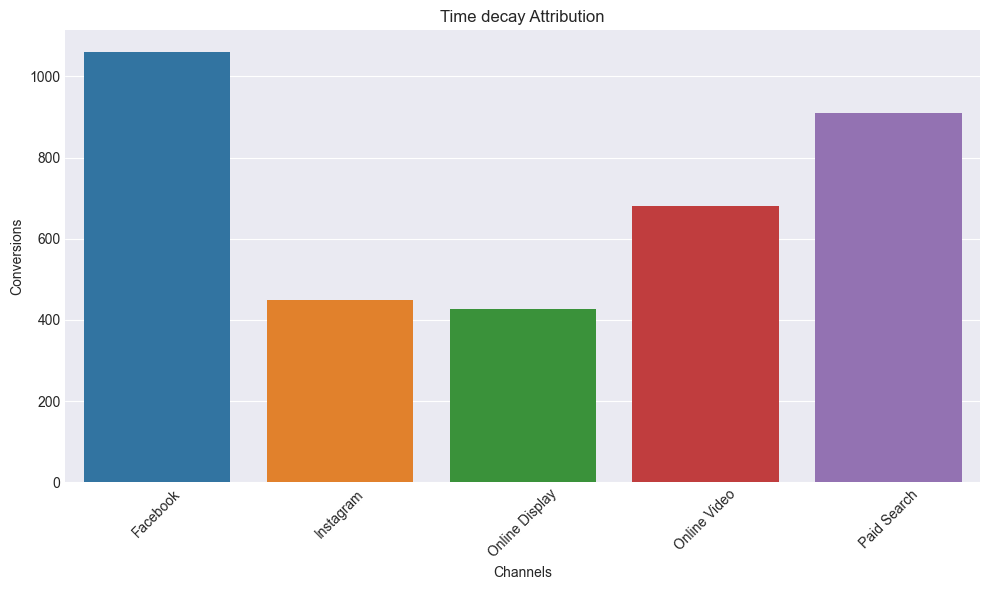

In [5]:
visualizer = AttributionVisualizer(time_decay)
visualizer.plot_bar_chart()


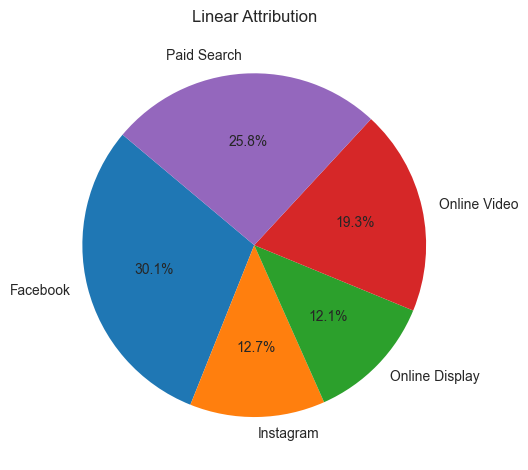

In [6]:
model = AttributionModel(dataset)
model.linear()
linear = model.get_results()

visualizer = AttributionVisualizer(linear)
visualizer.plot_pie_chart()

In [7]:
model.get_results()

,linear
channel,
Facebook,5301
Instagram,2244
Online Display,2139
Online Video,3408
Paid Search,4547


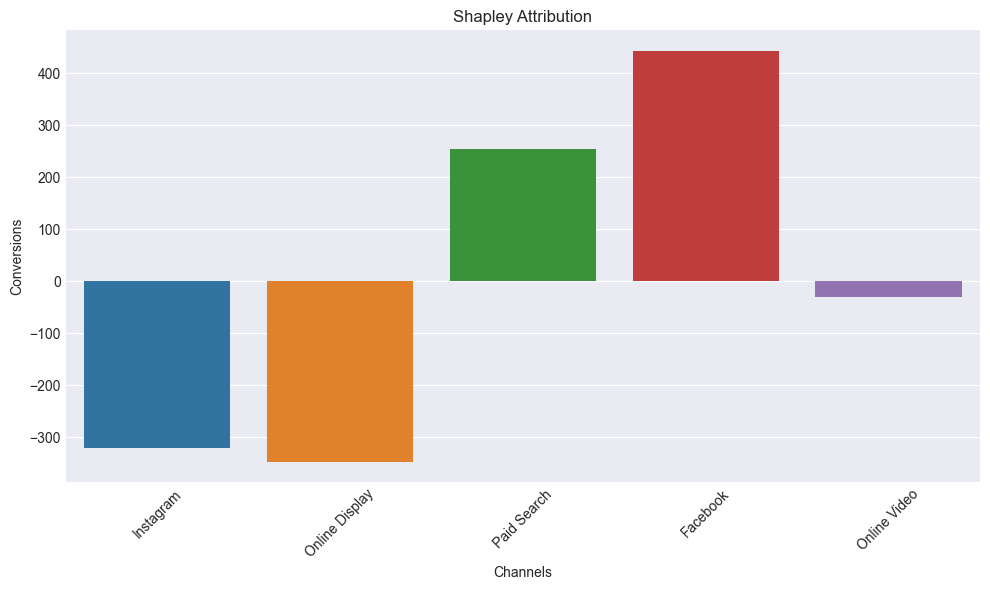

In [8]:
model = AttributionModel(dataset)
model.calculate_shapley()
shapley = model.get_results()

visualizer = AttributionVisualizer(shapley)
visualizer.plot_bar_chart()

In [9]:
#visualizer.plot_cumulative_attribution()

In [10]:
all_models = model.run_all()

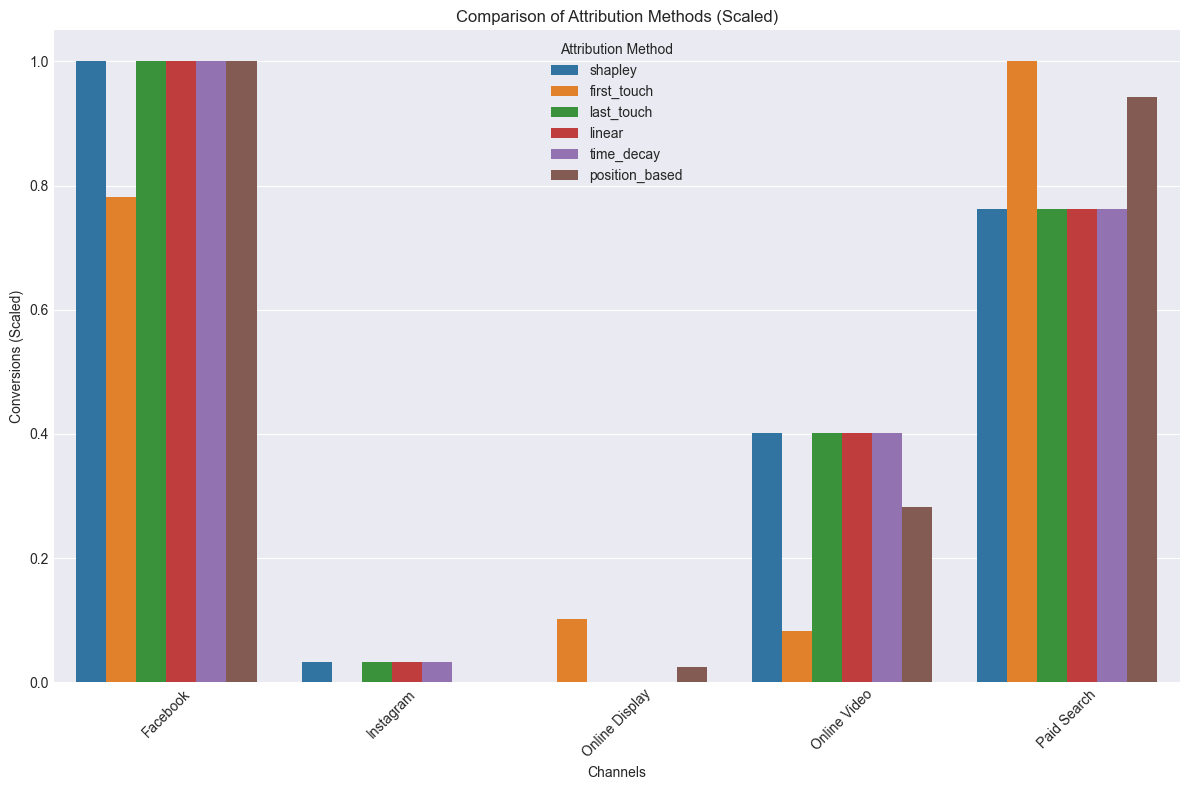

In [13]:
AttributionVisualizer(all_models).plot_comparison(scale_data=True)

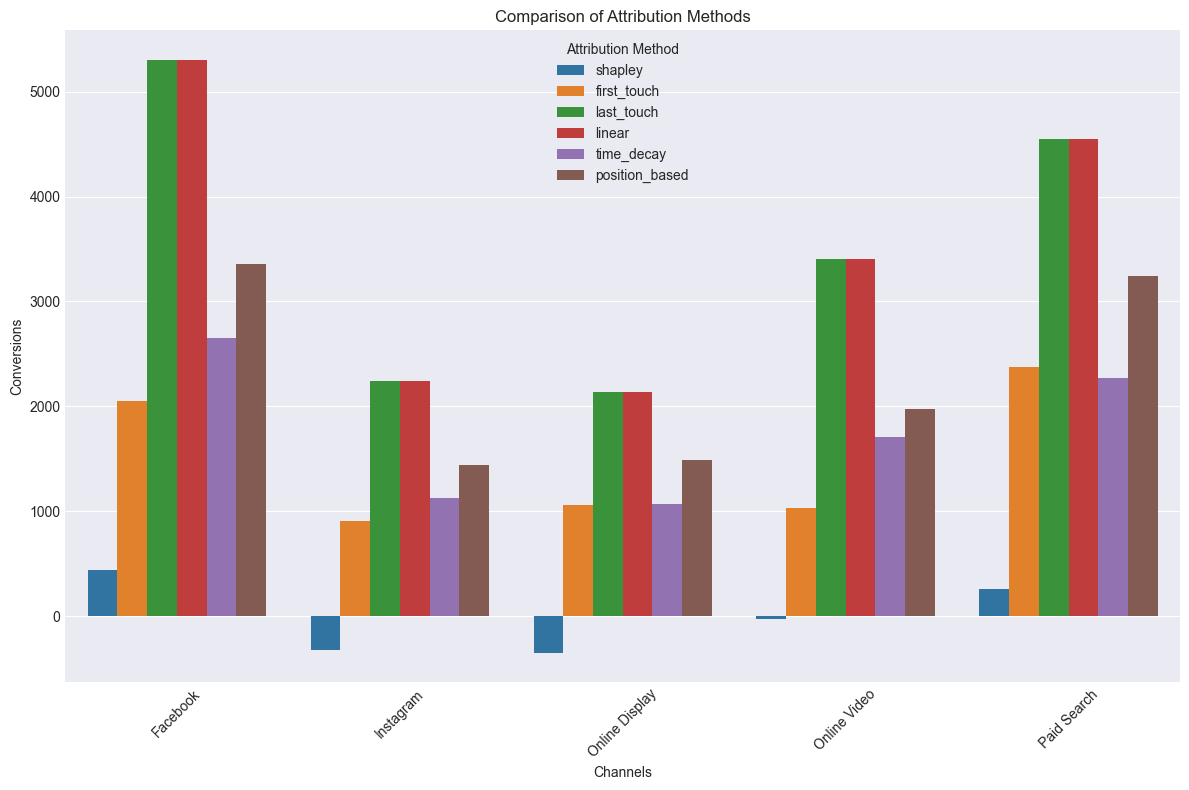

In [14]:
AttributionVisualizer(all_models).plot_comparison(scale_data=False)